In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("customer churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blank with 0 as tenure is 0 and no TotalCharges are recorded

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum().sum()

np.int64(0)

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df.duplicated().sum().sum()

np.int64(0)

In [20]:
df["customerID"].duplicated().sum().sum()

np.int64(0)

 converted value of 0/1 of seniorcitizen into No/Yes to easy understand

In [22]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [23]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


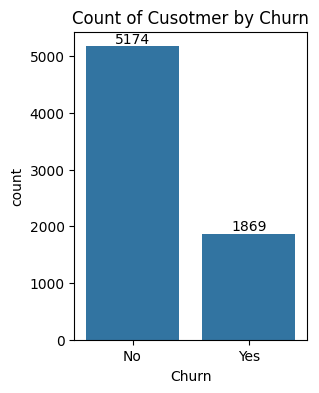

In [45]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Churn',data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of Cusotmer by Churn")
plt.show()

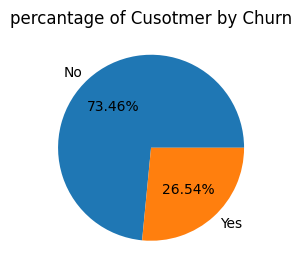

In [40]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})

plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("percantage of Cusotmer by Churn")
plt.show()

from the given pie chart we conclude the 26.54% customer churn out it.
now the explore reason behinde it

<function matplotlib.pyplot.show(close=None, block=None)>

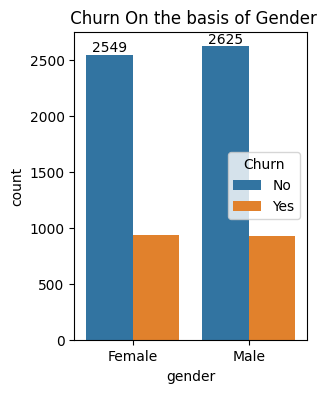

In [47]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='gender', data=df,hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title(" Churn On the basis of Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

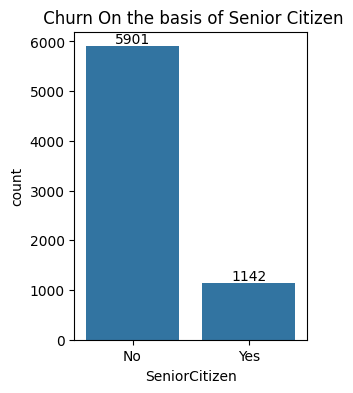

In [52]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title(" Churn On the basis of Senior Citizen")
plt.show

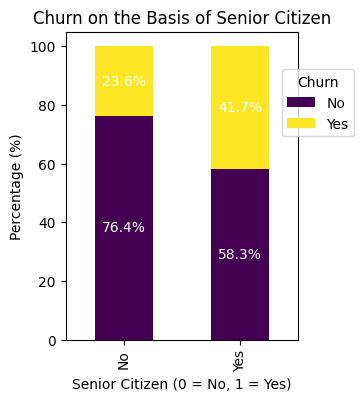

In [55]:
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot
fig, ax = plt.subplots(figsize=(3, 4))
cross_tab.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Add percentage labels
for container, churn_type in zip(ax.containers, cross_tab.columns):
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, 
                    f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Titles and labels
ax.set_title("Churn on the Basis of Senior Citizen", fontsize=12)
ax.set_xlabel("Senior Citizen (0 = No, 1 = Yes)")
ax.set_ylabel("Percentage (%)")
ax.legend(title="Churn",bbox_to_anchor=(0.9,0.9))

plt.show()

compratively a greater percentage of Senioir Citezen category has churned out.

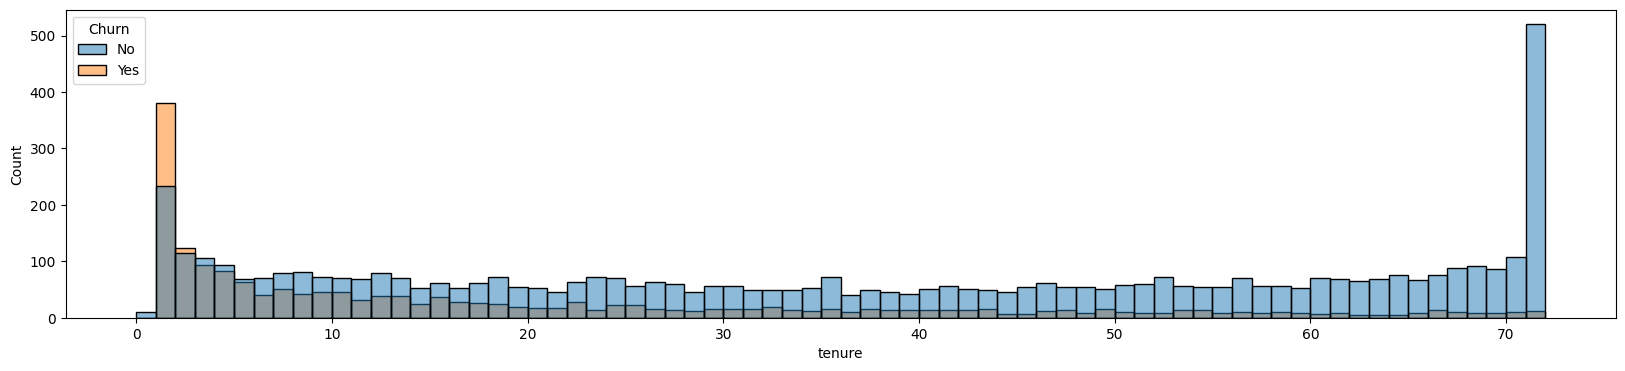

In [76]:
plt.figure(figsize=(20,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

#people who used our service for a long time have stayed and people who used our service for #1or2 months have churned out.

<function matplotlib.pyplot.show(close=None, block=None)>

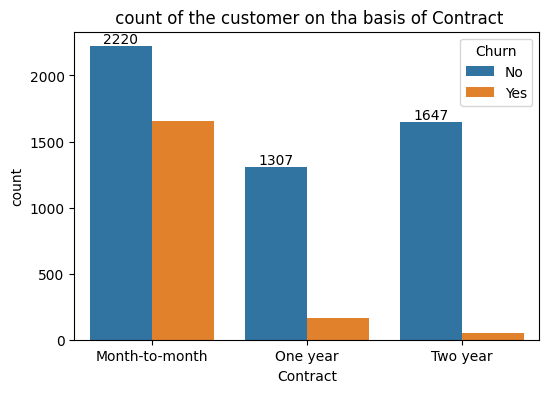

In [66]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Contract', data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title(" count of the customer on tha basis of Contract")
plt.show

people who have month-to-month contractor are likely to churn then from from those who have #1or2 year contract

In [67]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

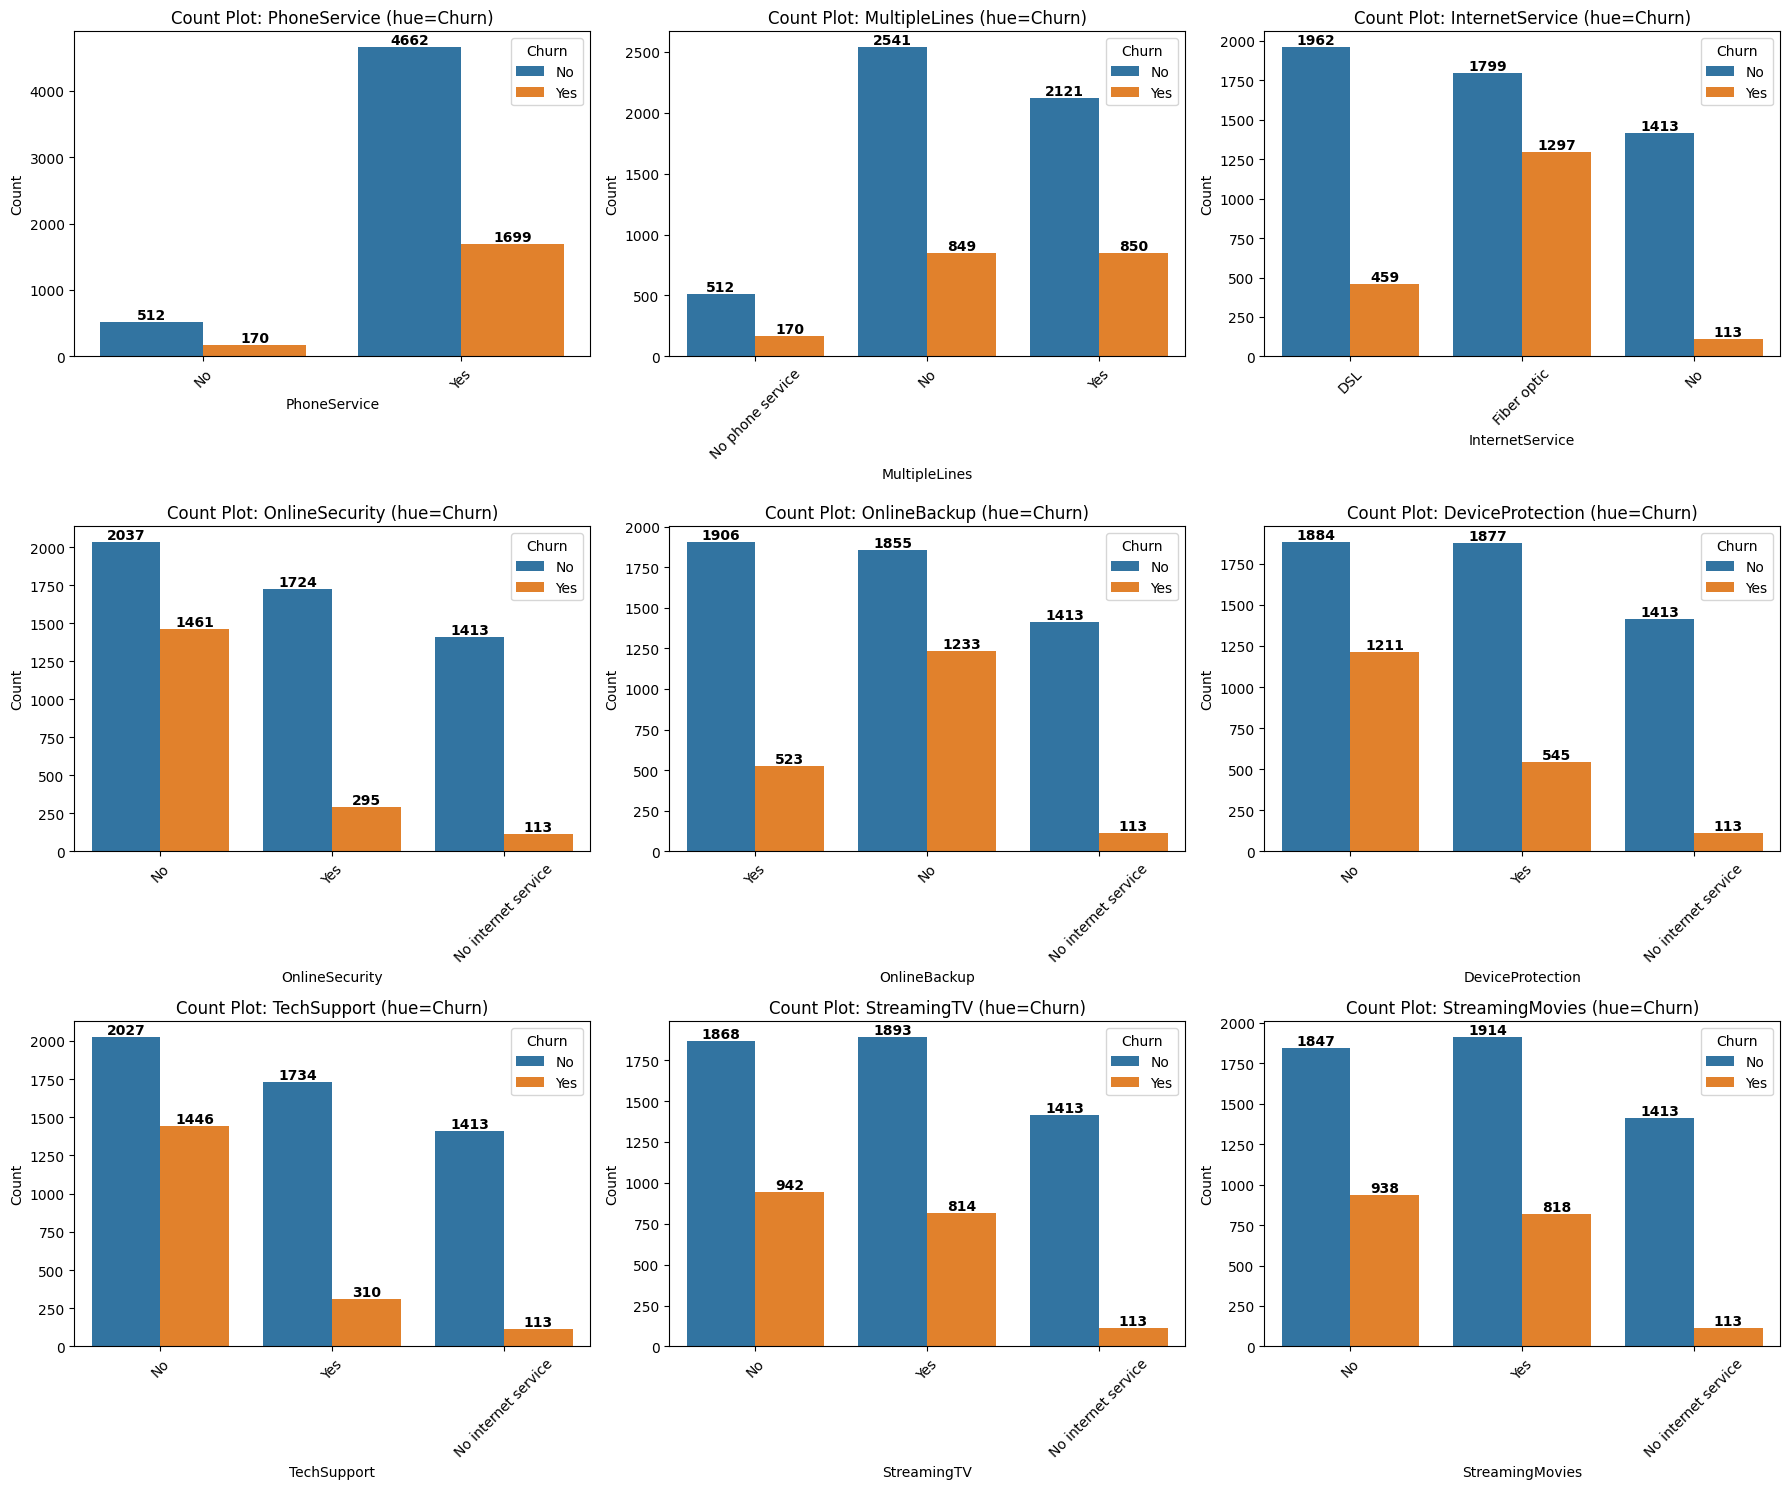

In [74]:


# Selected columns for plotting
selected_columns = ['PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

# Creating subplots
num_plots = len(selected_columns)
cols = 3  # Number of columns in subplot
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate rows needed
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(selected_columns):
    ax = sns.countplot(x=df[col], ax=axes[i], hue=df['Churn'])
    axes[i].set_title(f'Count Plot: {col} (hue=Churn)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')  # Add legend label
    
    # Add bar labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Fiber optic users exhibit a higher churn rate, suggesting potential dissatisfaction with service quality or pricing. Companies should focus on improving service satisfaction and promoting bundled security features to reduce churn effectively.

<function matplotlib.pyplot.show(close=None, block=None)>

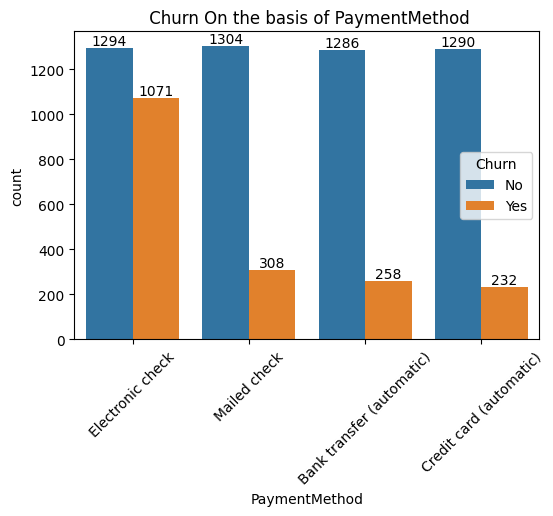

In [80]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod', data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title(" Churn On the basis of PaymentMethod")
plt.xticks(rotation=45)
plt.show

cutomer is likely to churn when they using electronic check as a payment method